Import packages and load the dataset, renamce columns to lowercase

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# natural language toolkit
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter


tweets = pd.read_parquet('../dataset/dataset.parquet')

col_names = {col: col.lower() for col in tweets.columns}
tweets = tweets.rename(columns=col_names)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jakub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.** Bar plot of sentiment label counts

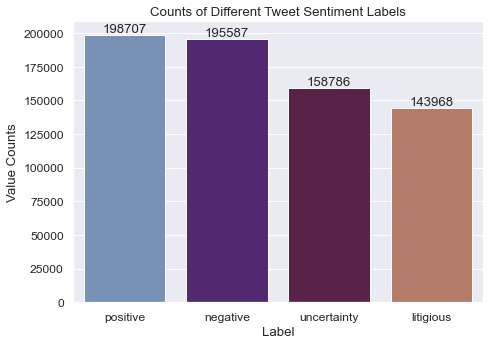

In [109]:
sns.set(rc={'figure.figsize':(7, 5)})
sns.set(style='darkgrid', font_scale=1.1)
ax = sns.countplot(x='label', data=tweets, palette='twilight',
             order = tweets['label'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xlabel('Label')
plt.ylabel('Value Counts')
plt.title('Counts of Different Tweet Sentiment Labels')
plt.tight_layout()
plt.savefig('charts/label_count_plot.png')
plt.show()


**2.** Most frequently used words

Remove stopwords

In [46]:
english_stopwords = stopwords.words('english')
new_stopwords = ["it's", 'u', 'were','im', "we're",'up…','one','must','dont','thats','youre','cant', 'they', "they're", "i'm", '-', "that's"]
english_stopwords.extend(new_stopwords)
tweets['text_clean'] = tweets.text.str.replace("’", "'")
tweets['text_clean'] = tweets.text_clean.str.replace("“", "")
tweets['text_clean'] = tweets.text_clean.str.replace("”", "")
tweets['text_clean'] = tweets.text_clean.str.lower()
tweets['text_clean'] = tweets.text_clean.str.replace(r'\n', '', regex = True)
tweets['text_clean'] = tweets.text_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

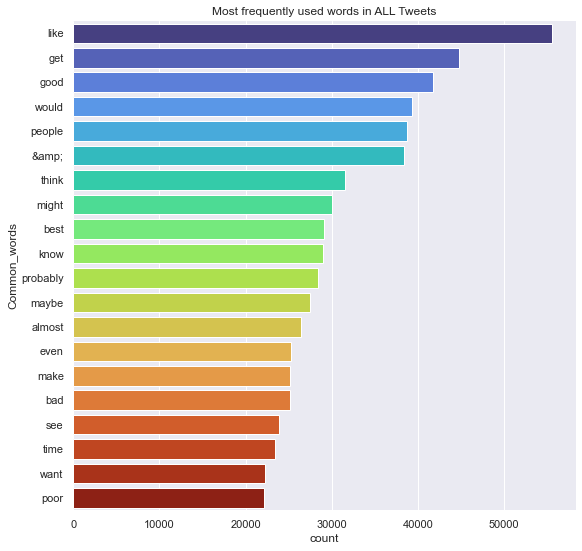

In [103]:
def plotCommonWords(df: pd.DataFrame, label: str, color_palette: str):
    if label == 'all':
        subset = df
    else:
        subset = df[df['label'] == label]
    top = Counter(" ".join(subset["text_clean"]).split())
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']

    sns.set(rc={'figure.figsize':(9, 9)})
    sns.barplot(data = temp, x='count', y = 'Common_words', palette=color_palette)
    sns.despine(left=True, bottom=True)
    plt.title(f"Most frequently used words in {label.upper()} Tweets")
    plt.savefig(f'charts/common_words_{label}.png')

plotCommonWords(tweets, 'all', 'turbo')

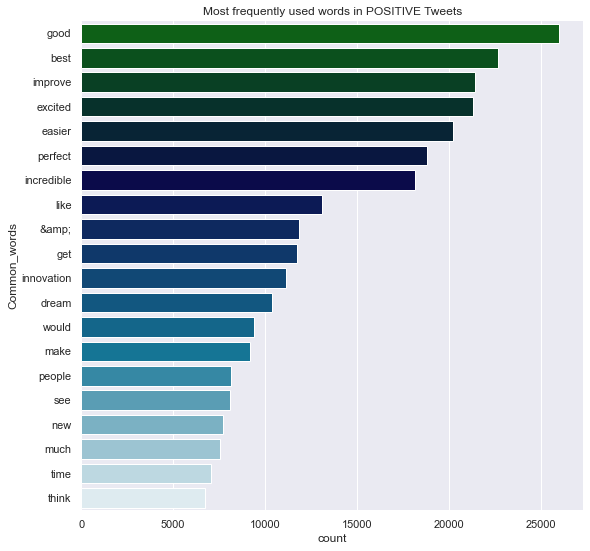

In [104]:
plotCommonWords(tweets, 'positive', 'ocean')

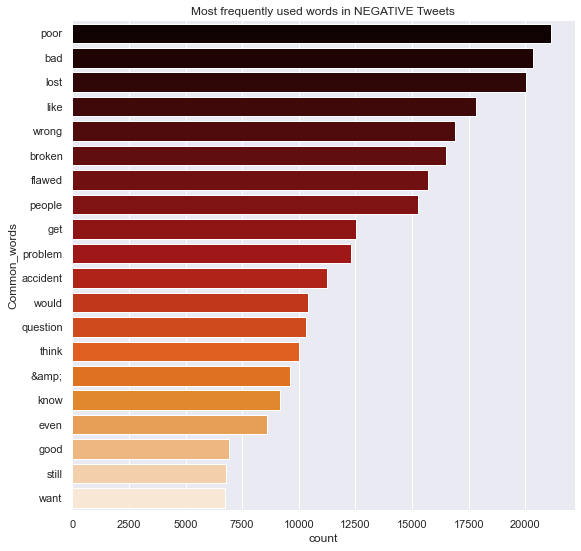

In [105]:
plotCommonWords(tweets, 'negative', 'gist_heat')

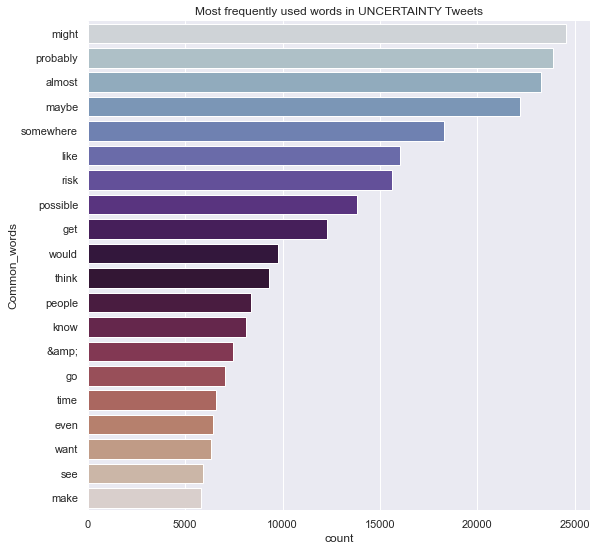

In [106]:
plotCommonWords(tweets, 'uncertainty', 'twilight')

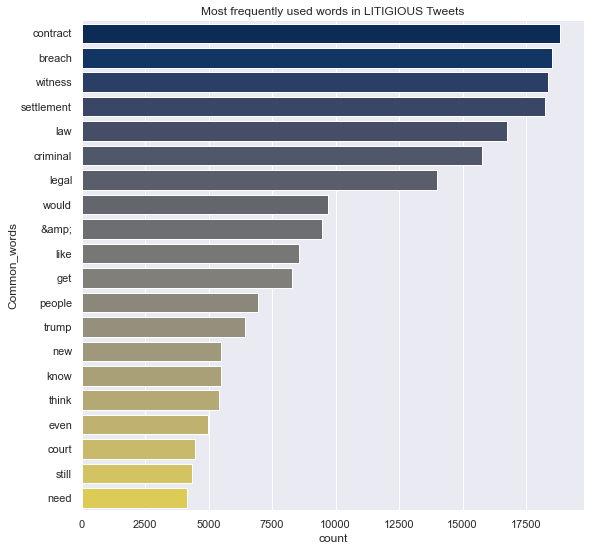

In [107]:
plotCommonWords(tweets, 'litigious', 'cividis')